### Import Libraries

In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime

### Fetch Commomwealth Bank of Australia and West Pac Bank Data

In [3]:
from pathlib import Path

# --- config ---
TICKERS = ["CBA.AX", "WBC.AX"]          # start with 2; we’ll add more later
START   = "2010-01-01"

# using adjusted prices avoids dividend/split jumps
AUTO_ADJUST = True

# --- paths ---
DATA_DIR   = Path("../data")
PLOTS_DIR  = Path("../outputs/plots")
DATA_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("Saving data to:", DATA_DIR.resolve())
print("Saving plots to:", PLOTS_DIR.resolve())

Saving data to: /Users/dipeshpaudel/Documents/ai-stock-prediction/data
Saving plots to: /Users/dipeshpaudel/Documents/ai-stock-prediction/outputs/plots


In [4]:
today_str = datetime.today().strftime('%Y-%m-%d')

data = yf.download(
    TICKERS,
    start=START,
    end=today_str,
    group_by="ticker",
    auto_adjust=AUTO_ADJUST,
    progress=False,
    threads=True
)

# save each ticker as its own CSV
for t in TICKERS:
    df_t = data[t].copy()
    df_t.to_csv(DATA_DIR / f"{t}_raw.csv")
    print(f"Saved {t}_raw.csv  ({len(df_t):,} rows)")

Saved CBA.AX_raw.csv  (3,964 rows)
Saved WBC.AX_raw.csv  (3,964 rows)


In [6]:
# peek at the most recent rows
for t in TICKERS:
    display(data[t].tail(3))

# build a simple Close-price dataframe for comparisons
close_df = (
    pd.concat({t: data[t]["Close"] for t in TICKERS}, axis=1)
    .dropna()
)
print(close_df.info())
close_df.tail()


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-09-03,169.000000,169.279999,164.300003,164.550003,2536459
2025-09-04,166.050003,168.214996,165.009995,168.000000,1657956
2025-09-05,169.270004,169.600006,167.250000,168.139999,1407522


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-09-03,38.299999,38.439999,37.110001,37.160000,5352406
2025-09-04,37.720001,38.060001,37.509998,37.900002,3716677
2025-09-05,38.139999,38.369999,38.049999,38.169998,3293617


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3964 entries, 2010-01-04 to 2025-09-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CBA.AX  3964 non-null   float64
 1   WBC.AX  3964 non-null   float64
dtypes: float64(2)
memory usage: 92.9 KB
None


,CBA.AX,WBC.AX
Date,,
2025-09-01,168.949997,38.250000
2025-09-02,170.460007,38.570000
2025-09-03,164.550003,37.160000
2025-09-04,168.000000,37.900002
2025-09-05,168.139999,38.169998


Plot absolute closing prices (professional look)

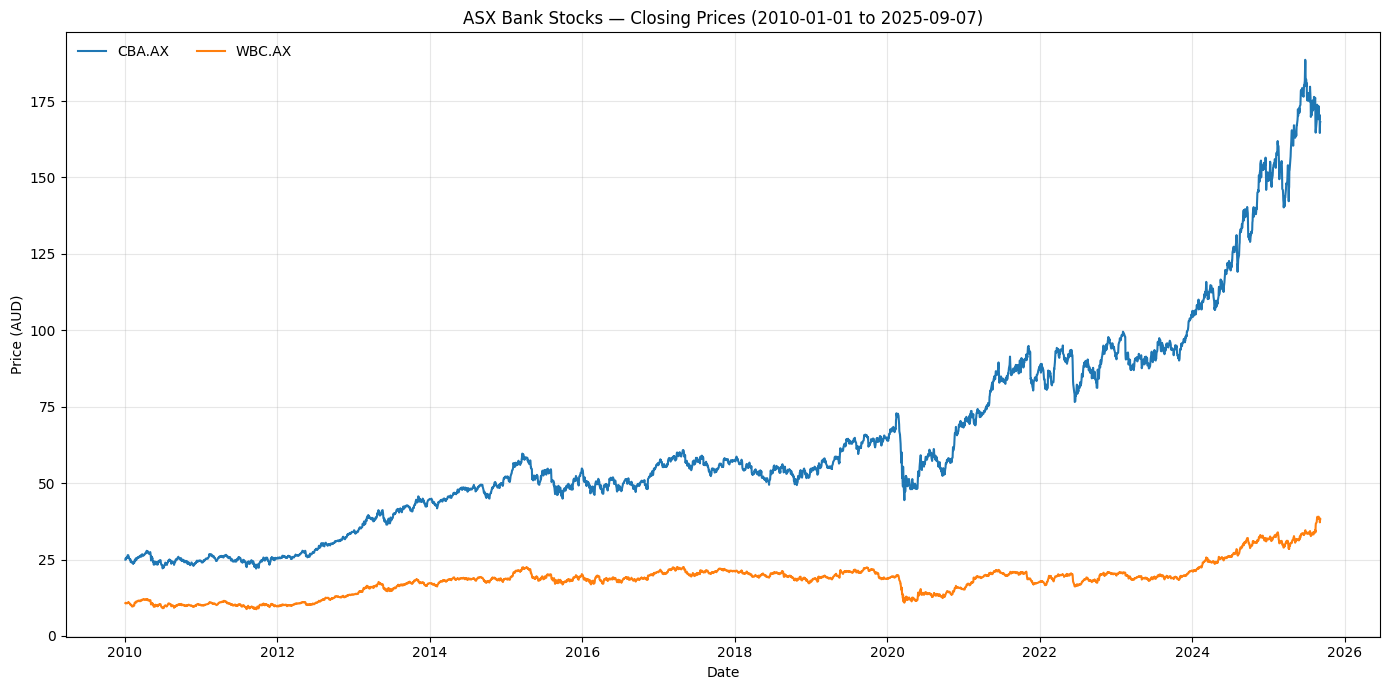

In [7]:
plt.figure(figsize=(14,7))
for t in TICKERS:
    plt.plot(data[t].index, data[t]["Close"], label=t)

plt.title("ASX Bank Stocks — Closing Prices ({} to {})".format(START, today_str))
plt.xlabel("Date"); plt.ylabel("Price (AUD)")
plt.grid(True, alpha=0.3)
plt.legend(frameon=False, ncol=len(TICKERS))
plt.tight_layout()
plt.savefig(PLOTS_DIR / "close_prices_absolute.png", dpi=200)
plt.show()


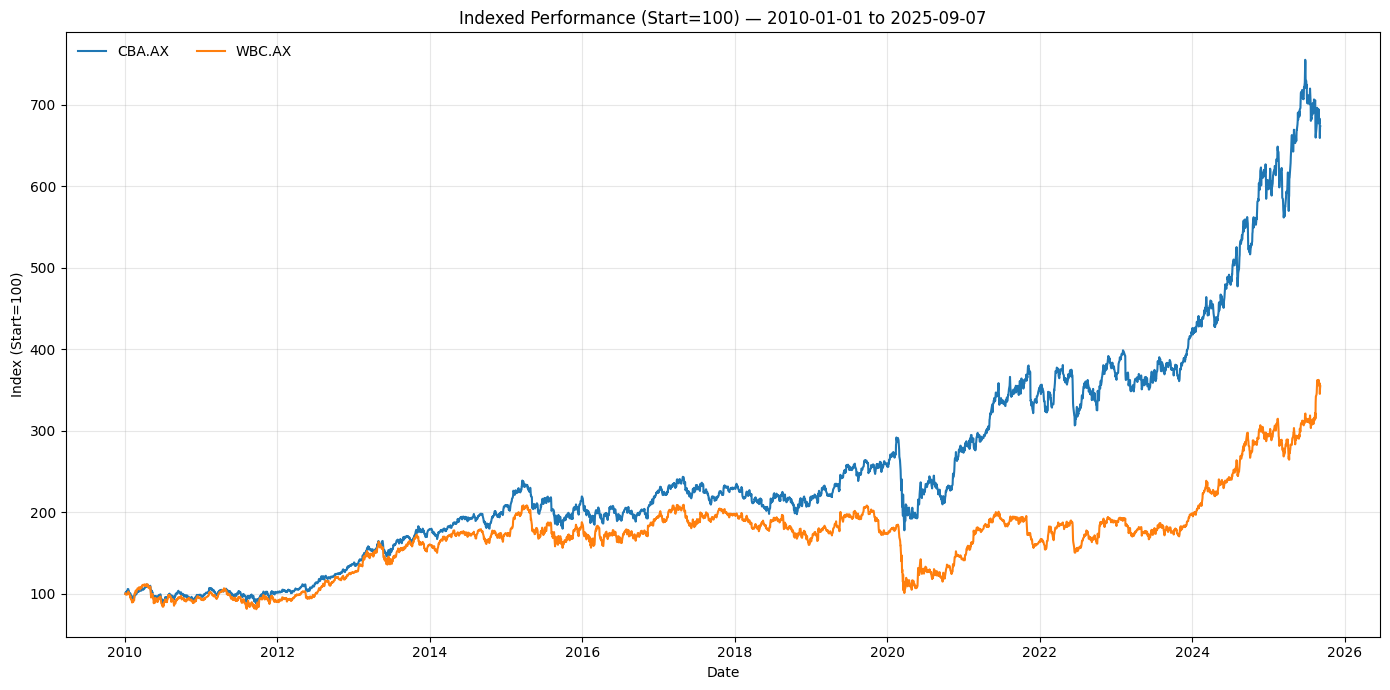

In [8]:
indexed = close_df / close_df.iloc[0] * 100

plt.figure(figsize=(14,7))
for t in TICKERS:
    plt.plot(indexed.index, indexed[t], label=t)

plt.title("Indexed Performance (Start=100) — {} to {}".format(START, today_str))
plt.xlabel("Date"); plt.ylabel("Index (Start=100)")
plt.grid(True, alpha=0.3)
plt.legend(frameon=False, ncol=len(TICKERS))
plt.tight_layout()
plt.savefig(PLOTS_DIR / "close_prices_indexed.png", dpi=200)
plt.show()

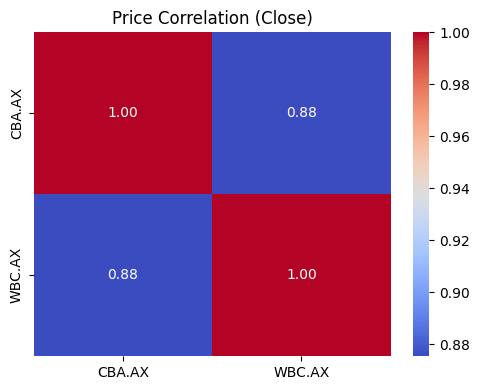

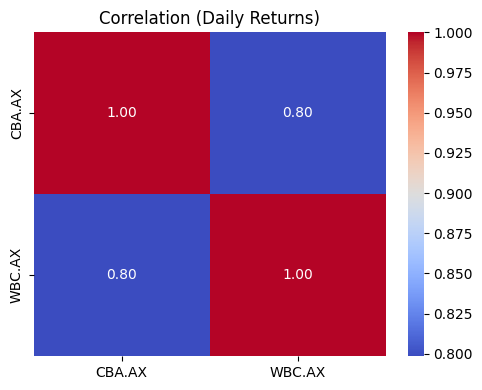

In [9]:
import seaborn as sns

# price correlation (less meaningful than returns, but quick look)
plt.figure(figsize=(5,4))
sns.heatmap(close_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Price Correlation (Close)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "corr_prices.png", dpi=200)
plt.show()

# returns correlation (more meaningful)
rets = close_df.pct_change().dropna()

plt.figure(figsize=(5,4))
sns.heatmap(rets.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation (Daily Returns)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "corr_returns.png", dpi=200)
plt.show()


In [11]:
print(TICKERS)

['CBA.AX', 'WBC.AX']


In [15]:
for i in TICKERS:
 print(data[i].head(3))

Price            Open       High        Low      Close   Volume
Date                                                           
2010-01-04  24.820229  25.002163  24.765649  24.956678   992762
2010-01-05  25.038546  25.379671  25.038546  25.334187  3163161
2010-01-06  25.475191  25.561609  25.375128  25.461546  3210425
Price            Open       High        Low      Close   Volume
Date                                                           
2010-01-04  10.781366  10.794126  10.738836  10.760101  2765223
2010-01-05  10.887691  10.887691  10.798378  10.849414  4773662
2010-01-06  10.798378  10.840908  10.747342  10.798378  3109106
